In [2]:
# !pip3 install numpy==1.21.5

In [1]:
%matplotlib inline
# from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

# import ast
import cv2
import skimage

from skimage.feature import hog, daisy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# pylab.rcParams['figure.figsize'] = (8.0, 10.0)

from torch import nn
import torchvision.models as models
from torchvision import transforms
# from torchsummary import summary
from torchvision import transforms
from PIL import Image

In [2]:
# #arr_0 is labels, arr_1 is images, arr_2 is hog features
# with np.load('data.npz') as data:
#     labels = data['arr_0']
#     imgs = data['arr_1']
#     hog_feats = data['arr_2']

In [3]:
np.version.full_version

'1.21.5'

In [2]:
#old
with np.load('data (1).npz') as data:
    labels_old = data['arr_0']
    imgs_old = data['arr_1']
#     hog_feats = data['arr_2']

In [3]:
#new
#arr_0 is labels, arr_1 is images, arr_2 is hog features
with np.load('data (2).npz') as data:
    labels = data['arr_0']
    imgs = data['arr_1']
#     hog_feats = data['arr_2']

In [4]:
labels.shape

(1652,)

In [5]:
imgs.shape

(1652, 128, 128)

In [7]:
labels_old.shape

(2966,)

In [8]:
imgs_old.shape

(2966, 128, 128)

In [8]:
tsne = TSNE(perplexity=7).fit_transform(imgs.reshape(imgs.shape[0], imgs.shape[1]**2))
pca = PCA(n_components=2).fit_transform(tsne)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
daisy_feats, daisy_ims = daisy(imgs[-1], visualize=True, step = 180, radius = 20)

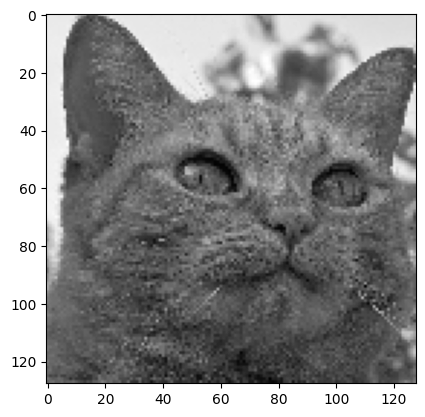

In [44]:
plt.imshow(imgs[-1], cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


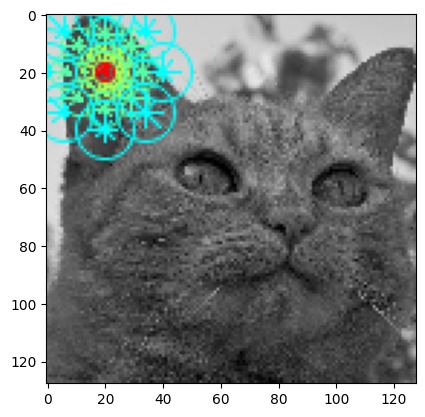

In [45]:
plt.imshow(daisy_ims, cmap ="gray")

In [8]:
hog_feats = hog_feats.reshape(hog_feats.shape[0],hog_feats.shape[1]*hog_feats.shape[2])
hog_feats.shape

(2966, 16384)

In [9]:
# def extract_hog_features(data):
#     num_samples = data.shape[0]
#     hog_features = []
#     for i in range(num_samples):
#         img = data[i]
#         feature = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
#         hog_features.append(feature)
#     return np.array(hog_features)

In [10]:
images = imgs.reshape(imgs.shape[0],imgs.shape[1]*imgs.shape[2])
images.shape

(2966, 16384)

In [11]:
# #split train and test
# x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
#downsample to fix class imbalance


In [13]:
# clf = MLPClassifier(solver ='adam',
#                    activation = 'relu',
#                    alpha = 0.001,
#                    hidden_layer_sizes = (512,128,10),
#                    random_state = 1,
#                    max_iter = 100,
#                    verbose = True)

In [14]:
# clf.fit(x_train, y_train)

In [15]:
# y_pred = clf.predict(x_test)

In [16]:
# print(classification_report(y_test,y_pred))

In [17]:
# clf_svc = SVC(kernel = 'rbf',
#               class_weight = 'balanced',
#               random_state = 1,
#               max_iter = 20,
#               verbose = True)

In [18]:
# clf_svc.fit(x_train,y_train)

In [19]:
# y_pred_svc = clf_svc.predict(x_test)

In [20]:
# print(classification_report(y_test,y_pred_svc))

### Canny Edge Detection

In [21]:
# imgs[0]

In [22]:
canny_feats = np.zeros(imgs.shape)
for im in range(0,imgs.shape[0]):
    edges = cv2.Canny(np.uint8(imgs[im]*255),100,200)
    canny_feats[im,:,:] = edges

In [23]:
canny_feats.shape

(2966, 128, 128)

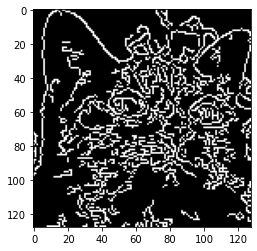

In [37]:
plt.imshow(canny_feats[-1], cmap="gray")
plt.savefig("./281 Final Report/cat_canny.png")

In [24]:
canny_ = canny_feats.reshape(canny_feats.shape[0], canny_feats.shape[1]*canny_feats.shape[2])
canny_.shape

(2966, 16384)

### Test HOG and Canny Features

In [25]:
feats = np.concatenate([hog_feats,canny_], axis = 1)

In [23]:
def train_model(features, labels = labels, model_type = 'mlp'):
    
    x_train,x_test,y_train,y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
#     x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
    
    if model_type == 'mlp' or 'all':
        clf = MLPClassifier(solver ='lbfgs',
                       activation = 'relu',
                       alpha = 50,
                       hidden_layer_sizes = (128,5),
                       random_state = 1,
                       max_iter = 500,
                       early_stopping = True,
                       verbose = False)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print('-'*30)
        print('MLP Results:')
        print(classification_report(y_test,y_pred))
        
        train_acc = clf.score(x_train, y_train)
        test_acc = clf.score(x_test, y_test)
        print(f"Train Accuracy: {train_acc}")
        print(f"Test Accuracy: {test_acc}")
    if model_type == 'all':
        print('-'*30)
        print('-'*30)
    if model_type == 'svc' or 'all':
        clf_svc = make_pipeline(StandardScaler(), SVC(kernel = 'rbf',
#                   class_weight = 'balanced',
                  random_state = 1,
                  max_iter =500,
                  verbose = False))
        clf_svc.fit(x_train,y_train)
        y_pred_svc = clf_svc.predict(x_test)
        print('SVC Results:')
        print(classification_report(y_test,y_pred_svc))

        train_acc = clf_svc.score(x_train, y_train)
        test_acc = clf_svc.score(x_test, y_test)
        print(f"Train Accuracy: {train_acc}")
        print(f"Test Accuracy: {test_acc}")

In [215]:
#hog features
# train_model(hog_feats, model_type = 'all')

In [32]:
#canny features
train_model(canny_, model_type = 'all')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      2097955     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77404D+01    |proj g|=  4.49120D+01



 This problem is unconstrained.


At iterate    1    f=  5.53637D+00    |proj g|=  3.73237D-01

At iterate    2    f=  5.52561D+00    |proj g|=  2.03121D-01

At iterate    3    f=  5.49934D+00    |proj g|=  1.74582D-01

At iterate    4    f=  5.47057D+00    |proj g|=  1.73337D-01

At iterate    5    f=  5.45138D+00    |proj g|=  1.71468D-01

At iterate    6    f=  5.44457D+00    |proj g|=  1.70318D-01

At iterate    7    f=  5.25518D+00    |proj g|=  1.35563D-01

At iterate    8    f=  3.94697D+00    |proj g|=  3.15434D+00

At iterate    9    f=  3.45837D+00    |proj g|=  7.73160D-01

At iterate   10    f=  3.39479D+00    |proj g|=  7.66451D-01

At iterate   11    f=  3.32812D+00    |proj g|=  4.06486D-01

At iterate   12    f=  3.32287D+00    |proj g|=  4.05740D-01

At iterate   13    f=  3.31041D+00    |proj g|=  2.59780D-01

At iterate   14    f=  3.30849D+00    |proj g|=  7.17071D-01

At iterate   15    f=  3.29002D+00    |proj g|=  6.15240D-01

At iterate   16    f=  3.22618D+00    |proj g|=  4.45140D-01

At itera

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.32      0.28      0.30       156
          17       0.22      0.12      0.16        89
          18       0.31      0.33      0.32        87
          27       0.36      0.38      0.37       140
          64       0.28      0.38      0.32       122

    accuracy                           0.31       594
   macro avg       0.30      0.30      0.29       594
weighted avg       0.30      0.31      0.30       594

Train Accuracy: 0.9786396852164138
Test Accuracy: 0.30808080808080807
------------------------------
------------------------------
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -137.101075, rho = -0.062725
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -131.913523, rho = -0.055208
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.23      0.17      0.19       156
          17       0.21      0.15      0.17        89
          18       0.20      0.18      0.19        87
          27       0.31      0.24      0.27       140
          64       0.23      0.43      0.30       122

    accuracy                           0.24       594
   macro avg       0.24      0.23      0.23       594
weighted avg       0.24      0.24      0.23       594

Train Accuracy: 0.9786396852164138
Test Accuracy: 0.30808080808080807


In [33]:
#both hog + canny
train_model(feats, model_type = 'all')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      4195107     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98086D+01    |proj g|=  4.48089D+01


 This problem is unconstrained.



At iterate    1    f=  2.84237D+01    |proj g|=  2.40132D+02

At iterate    2    f=  6.36799D+00    |proj g|=  5.14602D+00

At iterate    3    f=  6.23145D+00    |proj g|=  3.93107D+00

At iterate    4    f=  5.84335D+00    |proj g|=  1.15736D+00

At iterate    5    f=  5.67461D+00    |proj g|=  4.73980D-01

At iterate    6    f=  5.53406D+00    |proj g|=  1.40737D-01

At iterate    7    f=  5.47757D+00    |proj g|=  1.43349D-01

At iterate    8    f=  5.45850D+00    |proj g|=  1.43239D-01

At iterate    9    f=  5.45014D+00    |proj g|=  1.43477D-01

At iterate   10    f=  5.44429D+00    |proj g|=  1.43147D-01

At iterate   11    f=  5.43214D+00    |proj g|=  1.40477D-01

At iterate   12    f=  5.27047D+00    |proj g|=  1.11988D-01

At iterate   13    f=  3.99848D+00    |proj g|=  2.80031D-01

At iterate   14    f=  3.78108D+00    |proj g|=  1.77140D-01

At iterate   15    f=  3.72376D+00    |proj g|=  1.74824D-01

At iterate   16    f=  3.04050D+00    |proj g|=  1.18566D-01

At iter

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

Train Accuracy: 0.6975829117481731
Test Accuracy: 0.25084175084175087
------------------------------
------------------------------
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -135.562875, rho = -0.066190
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -131.686718, rho = -0.077214
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -177.685782, rho = -0.101216
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -169.589191, rho = -0.216934
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -132.710926, rho = -0.036792
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -137.931301, rho = 0.096332
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -137.1585

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.32      0.22      0.26       156
          17       0.26      0.21      0.24        89
          18       0.30      0.29      0.29        87
          27       0.56      0.14      0.22       140
          64       0.25      0.62      0.36       122

    accuracy                           0.29       594
   macro avg       0.34      0.30      0.27       594
weighted avg       0.35      0.29      0.27       594

Train Accuracy: 0.6975829117481731
Test Accuracy: 0.25084175084175087


In [56]:
hog_feats = hog_feats.reshape(2966, 128*128)
feats = np.concatenate([hog_feats,pca], axis = 1)

In [57]:
train_model(feats, model_type="svc")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      2098211     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37148D+00    |proj g|=  3.65742D-01

At iterate    1    f=  5.34609D+00    |proj g|=  4.05061D-01

At iterate    2    f=  5.33357D+00    |proj g|=  1.99829D-01

At iterate    3    f=  5.31833D+00    |proj g|=  1.71866D-01

At iterate    4    f=  5.30868D+00    |proj g|=  1.73525D-01

At iterate    5    f=  5.29504D+00    |proj g|=  3.13638D-01

At iterate    6    f=  5.27872D+00    |proj g|=  3.82186D-01

At iterate    7    f=  5.25678D+00    |proj g|=  2.91910D-01

At iterate    8    f=  5.17835D+00    |proj g|=  4.76480D-01

At iterate    9    f=  5.10159D+00    |proj g|=  9.37415D-01

At iterate   10    f=  5.02945D+00    |proj g|=  4.67451D-01

At iterate   11    f=  4.84435D+00    |proj g|=  5.39409D-01

At iterate   12    f=  4.22141D+00    |proj g|=  3.28393D+00

At iterate   13    f=  3.8

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.43      0.40      0.42       156
          17       0.00      0.00      0.00        89
          18       0.31      0.20      0.24        87
          27       0.45      0.67      0.54       140
          64       0.34      0.51      0.40       122

    accuracy                           0.40       594
   macro avg       0.31      0.36      0.32       594
weighted avg       0.33      0.40      0.35       594

Train Accuracy: 0.4266441821247892
Test Accuracy: 0.39730639730639733
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -146.415738, rho = -0.154196
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -143.939203, rho = -0.162811
nSV = 200, nBSV = 200
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
obj = -176.154042, rho = -0.145809
nSV = 200, nBSV = 200
WA

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.42      0.32      0.36       156
          17       0.26      0.24      0.25        89
          18       0.34      0.28      0.30        87
          27       0.55      0.13      0.21       140
          64       0.26      0.62      0.37       122

    accuracy                           0.32       594
   macro avg       0.36      0.32      0.30       594
weighted avg       0.38      0.32      0.30       594

Train Accuracy: 0.4266441821247892
Test Accuracy: 0.39730639730639733


### Plotting

In [10]:
def get_features(in_imgs, feat_name='pixels'):
  featurelist = []
  sample_img = None

  if feat_name == 'pixels':
    # stack flattened images into array
    
    for i in range (in_imgs.shape[0]):
      featurelist.append(in_imgs[i, :, :].flatten()[np.newaxis, :])
    features = np.vstack(featurelist)
    sample_img = in_imgs[-1, :, :]
  
  if feat_name == 'hog':
    # stack extracted hog features into array
    # also save the first hog image for plotting
    for i in range(in_imgs.shape[0]):
        fd, hog_image = hog(in_imgs[i, :, :], orientations=6, pixels_per_cell=(16, 16), 
                            cells_per_block=(2, 2), visualize=True, multichannel=False)
        if i == (in_imgs.shape[0]-1):
          sample_img = hog_image
        featurelist.append(fd[np.newaxis, :])

  if feat_name == 'canny':
        for i in range(0,in_imgs.shape[0]):
            edges = cv2.Canny(np.uint8(in_imgs[i]*255),100,200,L2gradient = True)
            if i == (in_imgs.shape[0]-1):
                sample_img = edges
#             if i == 0:
#               sample_img = hog_image
            featurelist.append(edges.reshape(1, edges.shape[0]*edges.shape[1]))
#         featurelist = featurelist.reshape(featurelist.shape[0], featurelist.shape[1]*featurelist.shape[2])
  
  if sample_img is not None:
    # plot the sample image
    plt.figure(figsize=(5,5))
    plt.imshow(sample_img, cmap='gray')
    plt.axis('off')
    plt.show()

  if featurelist:
    return np.vstack(featurelist)

  return None


In [11]:
list(np.unique(labels))

[1, 17, 18, 27, 64]

In [12]:
def plot_classes(X, y, ax, title):

  # color code each cluster (person ID)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

  # project the features into 2 dimensions
  for k in np.unique(y):
    ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.7, facecolors = colorst[list(np.unique(y)).index(k)], s = 2)

  ax.set_title(title)

In [13]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def retype_image(in_img):
  if np.max(in_img) > 1:
    in_img = in_img.astype(np.uint8)
  else:
    in_img = (in_img * 255.0).astype(np.uint8)
  return in_img

def read_image(in_url):
  # read the image and convert it to PIL image
  out_im = plt.imread(in_url)[:, :, :3]
  out_im = retype_image(out_im)
  
  # preprocess the image to prepare it for input to CNN
  out_im = preprocess(Image.fromarray(out_im))

  return out_im

In [14]:
def get_PCA(X_list, n_components=2):
    pca_list = []
    xpca_list = []
    for X in X_list:
        pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X)
        X_pca = pca.transform(X)
        pca_list.append(pca)
        xpca_list.append(X_pca)
    return pca_list, xpca_list

def plot_PCA(X_list, n_components=2):
    pca_list, xpca_list = get_PCA(X_list, n_components=n_components)
    plt.figure(figsize=(15,5))
    colors = ['b-', 'm-', 'k-']
    labels = ['pixel features', 'hog features', 'canny features']
    for i in range(len(X_list)):
        plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colors[i], label=labels[i])
    plt.xticks(np.arange(n_components)+1)
    plt.yticks(np.linspace(0, 1, 8))
#     plt.grid(b=True)
    plt.xlabel('Number of components')
    plt.ylabel('Explained Variances')
    plt.legend()
    plt.show()

def get_tsne(X_list, n_components=2):
    xtsne_list = []
    for X in X_list:
        tsne = TSNE(n_components=n_components, random_state=0)
        X_tsne = tsne.fit_transform(X)
        xtsne_list.append(X_tsne)
    return xtsne_list

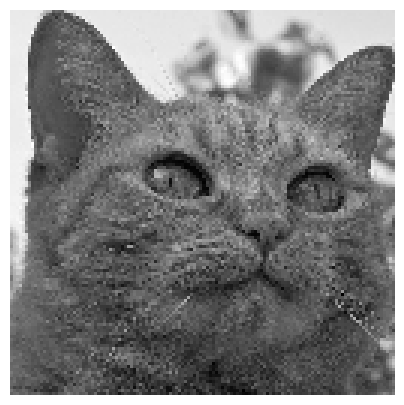

(1652, 16384)


/var/folders/_d/kjqjkq4d1hn0z5b5p1nkylgh0000gn/T/ipykernel_33379/3091968234.py:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(in_imgs[i, :, :], orientations=6, pixels_per_cell=(16, 16),


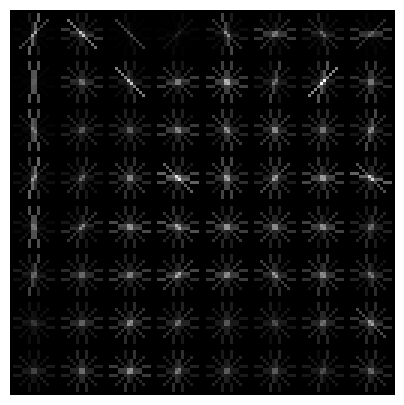

(1652, 1176)


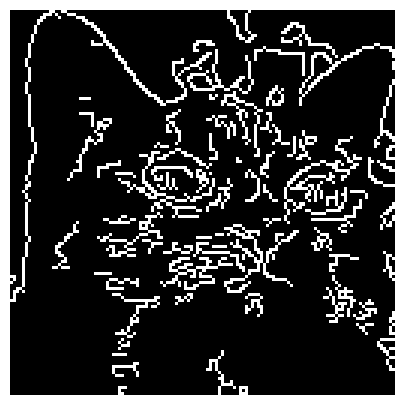

(1652, 16384)


In [15]:
pixel_features = get_features(imgs, feat_name='pixels')
print(pixel_features.shape)

hog_features = get_features(imgs, feat_name='hog')
print(hog_features.shape)

canny_features = get_features(imgs, feat_name='canny')
print(canny_features.shape)

# CNN_features = get_features(imgs, feat_name='CNN')
# print(CNN_features.shape)

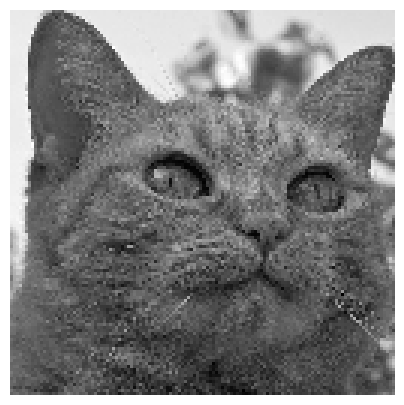

(1652, 16384)


/var/folders/_d/kjqjkq4d1hn0z5b5p1nkylgh0000gn/T/ipykernel_33379/3091968234.py:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(in_imgs[i, :, :], orientations=6, pixels_per_cell=(16, 16),


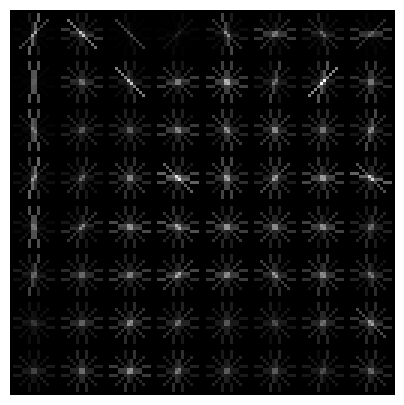

(1652, 1176)


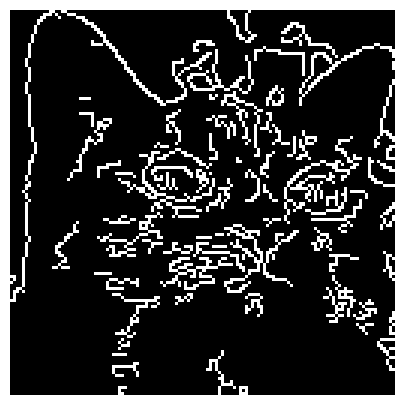

(1652, 16384)


In [16]:
pixel_features_old = get_features(imgs_old, feat_name='pixels')
print(pixel_features.shape)

hog_features_old = get_features(imgs_old, feat_name='hog')
print(hog_features.shape)

canny_features_old = get_features(imgs_old, feat_name='canny')
print(canny_features.shape)

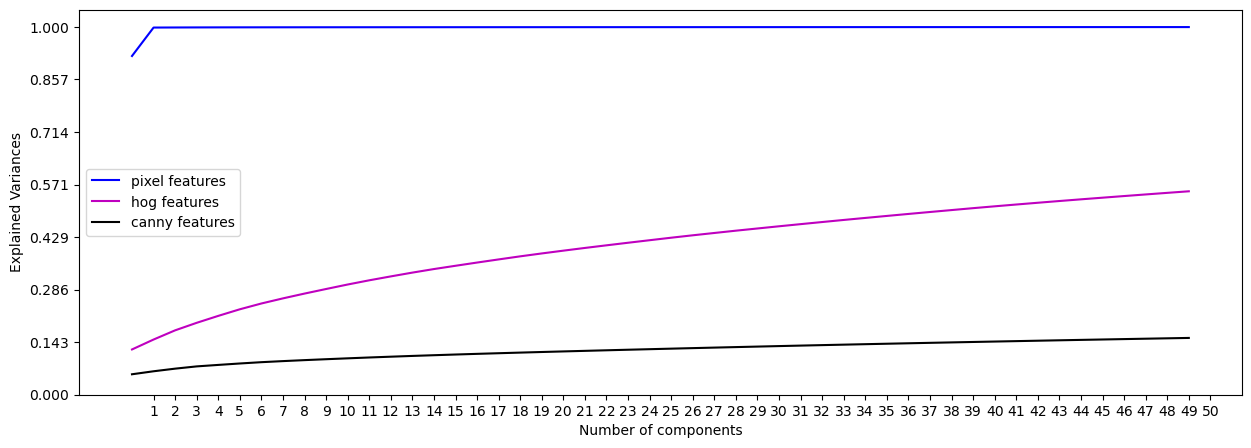

In [17]:
#old imgs
x = plot_PCA([pixel_features_old, hog_features_old, canny_features_old], n_components=50)

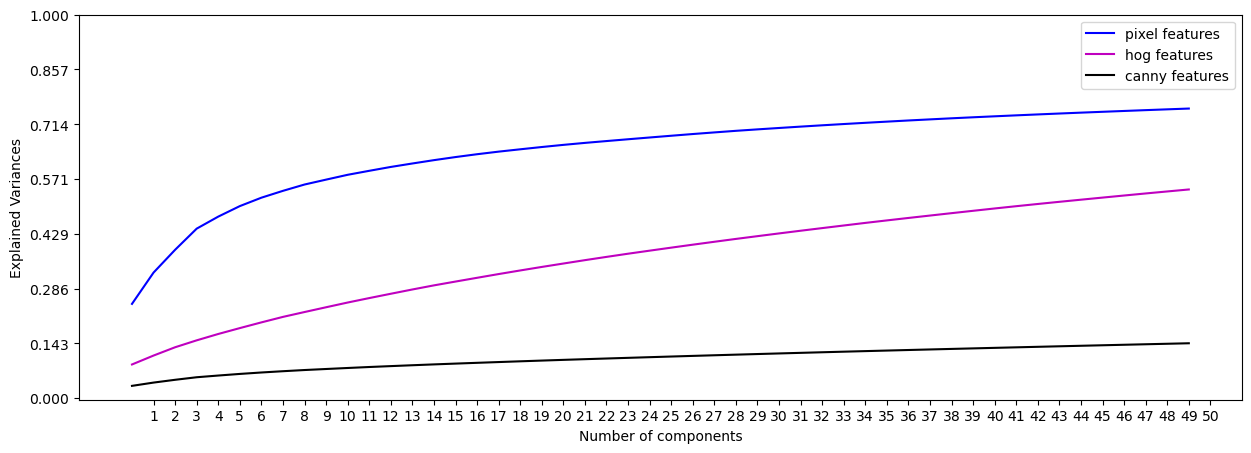

In [18]:
#new imgs
x = plot_PCA([pixel_features, hog_features, canny_features], n_components=50)

In [19]:
X_pixels_pca, X_hog_pca, X_canny_pca = get_PCA([pixel_features, hog_features, canny_features], n_components=2)[-1]
X_pixels_tsne, X_hog_tsne, X_canny_tsne = get_tsne([pixel_features, hog_features, canny_features], n_components=2)

/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users

In [20]:
X_pixels_pca_old, X_hog_pca_old, X_canny_pca_old = get_PCA([pixel_features_old, hog_features_old, canny_features_old], n_components=2)[-1]
X_pixels_tsne_old, X_hog_tsne_old, X_canny_tsne_old = get_tsne([pixel_features_old, hog_features_old, canny_features_old], n_components=2)

/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users

In [210]:
labels

array([ 1,  1,  1, ..., 17, 17, 17])

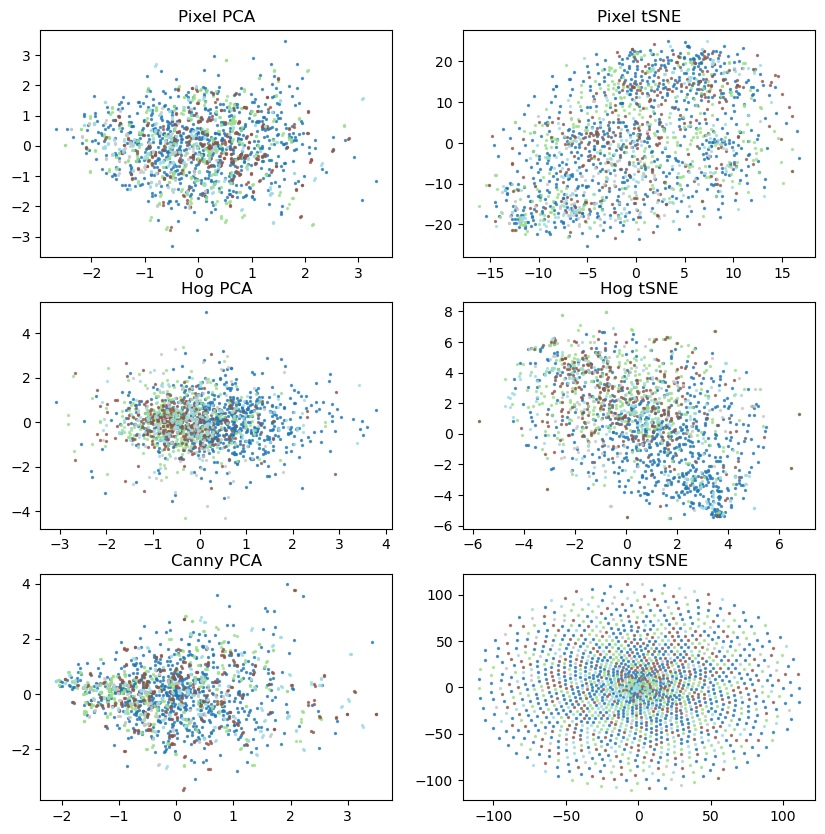

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

# y is the class labels (person ID)
plot_classes(X_pixels_pca, labels, ax[0,0], title='Pixel PCA')
plot_classes(X_pixels_tsne, labels, ax[0,1], title='Pixel tSNE')

plot_classes(X_hog_pca, labels, ax[1,0], title='Hog PCA')
plot_classes(X_hog_tsne, labels, ax[1,1], title='Hog tSNE')

plot_classes(X_canny_pca, labels, ax[2,0], title='Canny PCA')
plot_classes(X_canny_tsne, labels, ax[2,1], title='Canny tSNE')

plt.show()

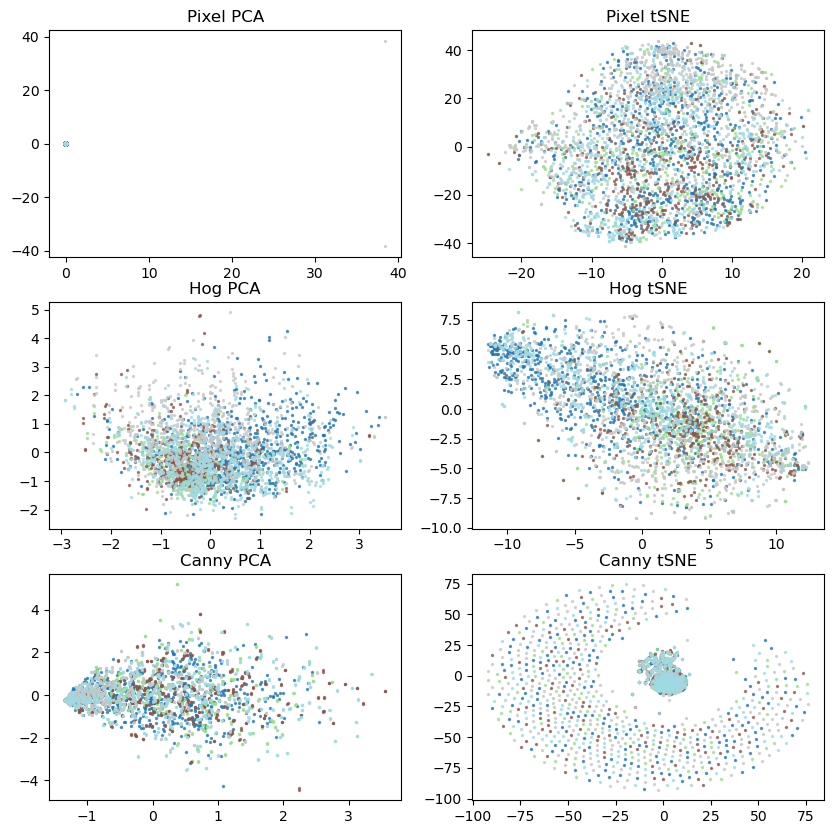

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

# y is the class labels (person ID)
plot_classes(X_pixels_pca_old, labels_old, ax[0,0], title='Pixel PCA')
plot_classes(X_pixels_tsne_old, labels_old, ax[0,1], title='Pixel tSNE')

plot_classes(X_hog_pca_old, labels_old, ax[1,0], title='Hog PCA')
plot_classes(X_hog_tsne_old, labels_old, ax[1,1], title='Hog tSNE')

plot_classes(X_canny_pca_old, labels_old, ax[2,0], title='Canny PCA')
plot_classes(X_canny_tsne_old, labels_old, ax[2,1], title='Canny tSNE')

plt.show()

In [ ]:
# train_model(X_hog_tsne, model_type = 'all')

In [248]:
# train_model(hog_features, model_type = 'all')

# Canny Models

### tSNE

In [24]:
#svc is better
train_model(X_canny_tsne_old, labels = labels_old, model_type = 'all')

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       156
          17       0.00      0.00      0.00        89
          18       0.00      0.00      0.00        87
          27       0.24      1.00      0.38       140
          64       0.00      0.00      0.00       122

    accuracy                           0.24       594
   macro avg       0.05      0.20      0.08       594
weighted avg       0.06      0.24      0.09       594

Train Accuracy: 0.25379426644182124
Test Accuracy: 0.2356902356902357
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Cou

SVC Results:
              precision    recall  f1-score   support

           1       0.27      0.22      0.25       156
          17       0.00      0.00      0.00        89
          18       0.00      0.00      0.00        87
          27       0.24      0.65      0.35       140
          64       0.26      0.17      0.21       122

    accuracy                           0.25       594
   macro avg       0.15      0.21      0.16       594
weighted avg       0.18      0.25      0.19       594

Train Accuracy: 0.24662731871838112
Test Accuracy: 0.2474747474747475


### PCA

In [25]:
#svc is better
train_model(X_canny_pca_old, labels = labels_old, model_type = 'all')

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.33      0.01      0.01       156
          17       0.00      0.00      0.00        89
          18       0.00      0.00      0.00        87
          27       0.33      0.75      0.46       140
          64       0.24      0.52      0.32       122

    accuracy                           0.29       594
   macro avg       0.18      0.26      0.16       594
weighted avg       0.21      0.29      0.18       594

Train Accuracy: 0.33220910623946037
Test Accuracy: 0.28619528619528617
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Cou

SVC Results:
              precision    recall  f1-score   support

           1       0.31      0.24      0.27       156
          17       0.42      0.06      0.10        89
          18       0.50      0.01      0.02        87
          27       0.34      0.74      0.46       140
          64       0.28      0.36      0.31       122

    accuracy                           0.32       594
   macro avg       0.37      0.28      0.23       594
weighted avg       0.36      0.32      0.26       594

Train Accuracy: 0.357504215851602
Test Accuracy: 0.31986531986531985


### Standard

In [ ]:
train_model(canny_features_old, labels = labels_old, model_type = 'all')

# HOG Models

### tSNE

In [27]:
#svc is better
train_model(X_hog_tsne_old, labels = labels_old, model_type = 'all')

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.42      0.44      0.43       156
          17       0.00      0.00      0.00        89
          18       0.32      0.21      0.25        87
          27       0.32      0.44      0.37       140
          64       0.22      0.32      0.26       122

    accuracy                           0.31       594
   macro avg       0.25      0.28      0.26       594
weighted avg       0.28      0.31      0.29       594

Train Accuracy: 0.3351602023608769
Test Accuracy: 0.3148148148148148
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Cou

SVC Results:
              precision    recall  f1-score   support

           1       0.43      0.53      0.48       156
          17       0.50      0.01      0.02        89
          18       0.27      0.18      0.22        87
          27       0.34      0.51      0.41       140
          64       0.25      0.27      0.26       122

    accuracy                           0.35       594
   macro avg       0.36      0.30      0.28       594
weighted avg       0.36      0.35      0.31       594

Train Accuracy: 0.37268128161888703
Test Accuracy: 0.3451178451178451


### PCA

In [28]:
train_model(X_hog_pca_old, labels = labels_old, model_type = 'all')

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.49      0.45      0.47       156
          17       0.34      0.36      0.35        89
          18       0.29      0.02      0.04        87
          27       0.40      0.54      0.46       140
          64       0.25      0.33      0.29       122

    accuracy                           0.37       594
   macro avg       0.35      0.34      0.32       594
weighted avg       0.37      0.37      0.35       594

Train Accuracy: 0.36467116357504215
Test Accuracy: 0.37037037037037035
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.51      0.47      0.49       156
          17       0.33      0.22      0.27        89
          18       0.28      0.31      0.30        87
          27       0.40      0.48      0.44       140
          64       0.32      0.32      0.32       122

    accuracy                           0.38       594
   macro avg       0.37      0.36      0.36       594
weighted avg       0.38      0.38      0.38       594

Train Accuracy: 0.38195615514333897
Test Accuracy: 0.38215488215488214


### Standard

In [29]:
train_model(hog_features_old, labels = labels_old, model_type = 'all')

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       156
          17       0.00      0.00      0.00        89
          18       0.00      0.00      0.00        87
          27       0.24      1.00      0.38       140
          64       0.00      0.00      0.00       122

    accuracy                           0.24       594
   macro avg       0.05      0.20      0.08       594
weighted avg       0.06      0.24      0.09       594

Train Accuracy: 0.25379426644182124
Test Accuracy: 0.2356902356902357
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Cou

SVC Results:
              precision    recall  f1-score   support

           1       0.61      0.53      0.57       156
          17       0.36      0.27      0.31        89
          18       0.41      0.36      0.38        87
          27       0.56      0.69      0.62       140
          64       0.48      0.57      0.52       122

    accuracy                           0.51       594
   macro avg       0.49      0.48      0.48       594
weighted avg       0.51      0.51      0.50       594

Train Accuracy: 0.8827993254637436
Test Accuracy: 0.5117845117845118


# Combination Models

In [31]:
feats = np.concatenate([hog_features_old,canny_features_old], axis = 1)
tsne_feats = np.concatenate([X_hog_tsne_old, X_canny_tsne_old], axis = 1)
pca_feats = np.concatenate([X_hog_pca_old, X_canny_pca_old], axis = 1)

### tSNE

In [32]:
train_model(tsne_feats, labels = labels_old, model_type = 'all')

/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` para

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.40      0.51      0.45       156
          17       0.00      0.00      0.00        89
          18       0.26      0.28      0.27        87
          27       0.32      0.47      0.38       140
          64       0.16      0.13      0.15       122

    accuracy                           0.31       594
   macro avg       0.23      0.28      0.25       594
weighted avg       0.25      0.31      0.28       594

Train Accuracy: 0.3553962900505902
Test Accuracy: 0.3114478114478115
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: Undefine

SVC Results:
              precision    recall  f1-score   support

           1       0.40      0.47      0.43       156
          17       0.00      0.00      0.00        89
          18       0.21      0.21      0.21        87
          27       0.33      0.41      0.37       140
          64       0.21      0.25      0.23       122

    accuracy                           0.30       594
   macro avg       0.23      0.27      0.25       594
weighted avg       0.25      0.30      0.28       594

Train Accuracy: 0.3642495784148398
Test Accuracy: 0.30303030303030304


### PCA

In [33]:
train_model(pca_feats, labels = labels_old, model_type = 'all')

------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.49      0.34      0.40       156
          17       0.29      0.22      0.25        89
          18       0.17      0.02      0.04        87
          27       0.39      0.71      0.50       140
          64       0.26      0.31      0.28       122

    accuracy                           0.36       594
   macro avg       0.32      0.32      0.30       594
weighted avg       0.34      0.36      0.32       594

Train Accuracy: 0.38069139966273186
Test Accuracy: 0.3569023569023569
------------------------------
------------------------------


/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Results:
              precision    recall  f1-score   support

           1       0.59      0.40      0.48       156
          17       0.30      0.28      0.29        89
          18       0.27      0.23      0.25        87
          27       0.42      0.65      0.51       140
          64       0.38      0.36      0.37       122

    accuracy                           0.41       594
   macro avg       0.39      0.39      0.38       594
weighted avg       0.42      0.41      0.40       594

Train Accuracy: 0.4494097807757167
Test Accuracy: 0.4090909090909091


In [ ]:
train_model(feats, labels = labels_old, model_type = 'all')

/Users/Courtney/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


------------------------------
MLP Results:
              precision    recall  f1-score   support

           1       0.31      0.32      0.32       156
          17       0.19      0.09      0.12        89
          18       0.23      0.26      0.24        87
          27       0.35      0.35      0.35       140
          64       0.26      0.32      0.28       122

    accuracy                           0.28       594
   macro avg       0.27      0.27      0.26       594
weighted avg       0.28      0.28      0.28       594

Train Accuracy: 0.9679595278246206
Test Accuracy: 0.2845117845117845
------------------------------
------------------------------


### Compare dataset class counts

- Switched back to original dataset

In [240]:
np.asarray(np.unique(labels,return_counts = True)).transpose()

array([[  1, 700],
       [ 17, 352],
       [ 18, 316],
       [ 27,  94],
       [ 64, 190]])

In [241]:
np.asarray(np.unique(labels_old,return_counts = True)).transpose()

array([[  1, 700],
       [ 17, 404],
       [ 18, 436],
       [ 27, 742],
       [ 64, 684]])